In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
#import statsmodels.formula.api as ols
from statsmodels.formula.api import ols

In [7]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
df = pd.read_csv(boston_url)

In [8]:
print(df)

     Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0             0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1             1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2             2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3             3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4             4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0   
502         502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0   
503         503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0   
504         504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0   
505         505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0   

       TAX  PTRATIO  LSTAT  MEDV  
0   

In [9]:
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [10]:
df.tail()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0
505,505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,7.88,11.9


# 1. Provide a boxplot for "Median value of owner-occupied homes"
# boxplot() is provided by seaborn package

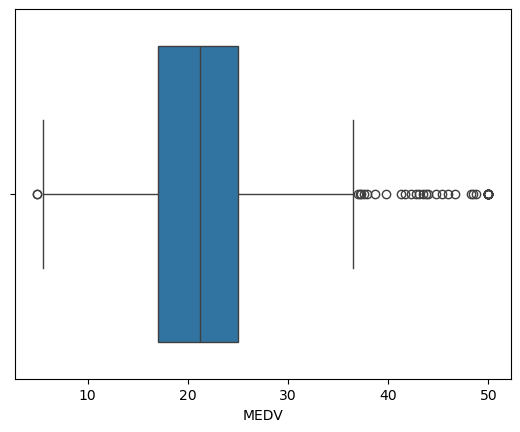

In [11]:
boxplot_medv = sns.boxplot(data=df, x='MEDV')

# 2. Provide a bar plot for the Charles river variable
# barplot() is provided by seaborn package

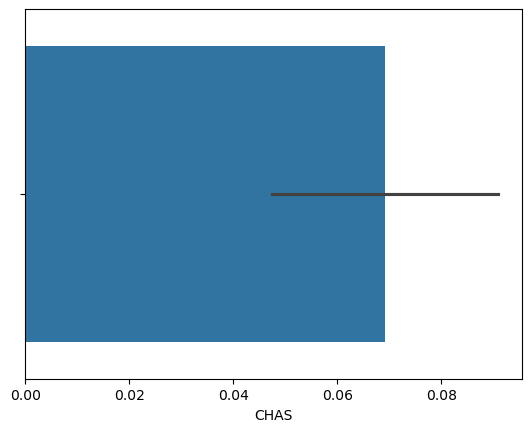

In [12]:
barplot_chas = sns.barplot(data=df, x='CHAS')

# 3. Provide a boxplot for the MEDV variable vs the AGE variable (Discretize the age into three groups of
# 35 years and younger, between 35 and 70 years, and 70 years and older)

In [13]:
df.loc[(df['AGE']<=35), 'AGE_group'] = '35 years and younger'
df.loc[(df['AGE']>35)&(df['AGE']<70), 'AGE_group'] = 'between 35 and 70 years'
df.loc[(df['AGE']>=70), 'AGE_group'] = '70 years and older'
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


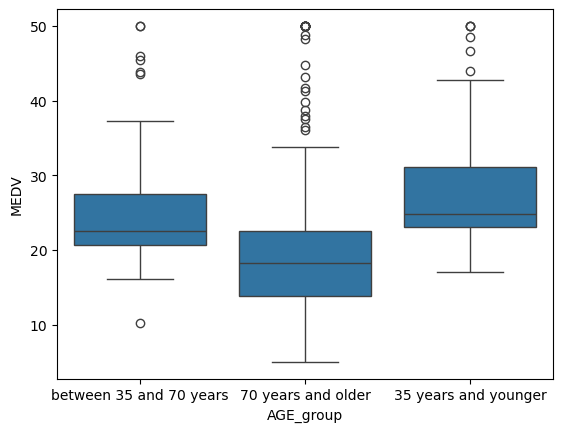

In [14]:
boxplot_group = sns.boxplot(data=df, x='AGE_group', y='MEDV')

# 4. Provide a scatterplot to show relationship between Nitric oxide concentrations and the proportion of
# non-profit business acres per town. What can you say about relationship?

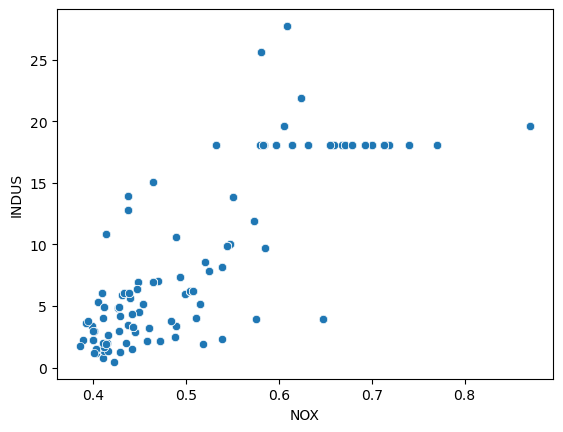

In [15]:
scatterplot_NOXINDUS = sns.scatterplot(data=df, x='NOX', y='INDUS')

Relation is positive within the range (0.4, 0.6) for NOX. The higher proportion of non-retail business per acres,
the higher nitric oxide concentrations.

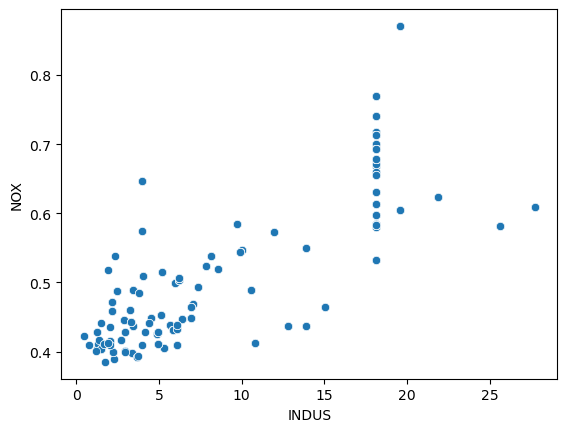

In [16]:
scatterplot_NOXINDUS = sns.scatterplot(data=df, x='INDUS', y='NOX')

# 5. Create a histogram for the pupil to teacher ratio variable

<Axes: xlabel='PTRATIO', ylabel='Count'>

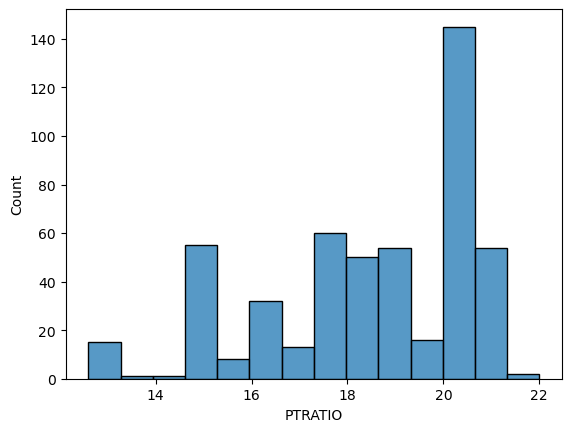

In [17]:
sns.histplot(x='PTRATIO', data=df)

# 6. Is there a significant difference in median value of houses bounded by the Charles river or not?
# (T-test for independent samples)

In [19]:
group_yes = df[df['CHAS']==1]['MEDV']
group_no = df[df['CHAS']==0]['MEDV']
scipy.stats.ttest_ind(group_yes, group_no, equal_var=True)
#Because p-value<0.05, there is no evidence to reject H0 (no difference). So there is a significant difference
#in median house values (MEDV) depending on Charles River boundary

TtestResult(statistic=np.float64(3.996437466090509), pvalue=np.float64(7.390623170519905e-05), df=np.float64(504.0))

# 7. Is there a difference in Median Values of houses (MEDV) for each proportion of owner occupied units
# built prior 1940 (AGE)? (ANOVA)

In [20]:
young = df[df['AGE_group'] == '35 years and younger']['MEDV']
mid = df[df['AGE_group'] == 'between 35 and 70 years']['MEDV']
old = df[df['AGE_group'] == '70 years and older']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(young, mid, old)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


Because p-value<0.05, we reject H0. There is significant difference in house values (MEDV) across age groups

# 8. Can we conclude that there is no relationship between Nitric oxide concentration and proportion
# of non-retail business acres per town? (Pearson Correlation)

In [22]:
corr, p_value = scipy.stats.pearsonr(df['NOX'], df['INDUS'])
print("Corr: {0}, P-Value: {1}".format(corr,p_value))
#p_value<0.05. We reject H0. Significant correlation between NOX concentration and proportion of non-retail
#business acres

Corr: 0.763651446920915, P-Value: 7.913361061241167e-98


# 9. What is the impact of an additional weighted distance to five Boston employment centers on the median value
# of owner occupied homes? (Regression analysis)

In [23]:
X = df['DIS']
y = df['MEDV']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
model.summary()
#DIS coeff is positive. Each additional unit distance to employment centers is associated with an increase
#in median house value.
#Relationship is statistically significant as p-value for DIS is <0.05

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 03 Oct 2025   Prob (F-statistic):           1.21e-08
Time:                        11:59:36   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
predictions = model.predict(X) # in-sample prediction
predictions

0      22.854786
1      23.812239
2      23.812239
3      25.007665
4      25.007665
         ...    
501    21.095760
502    20.887153
503    20.756160
504    20.997843
505    21.124579
Length: 506, dtype: float64

In [29]:
#Alternative approach
#from statsmodels.formula.api import ols
lm = ols('MEDV ~ DIS', data = df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 03 Oct 2025   Prob (F-statistic):           1.21e-08
Time:                        12:12:00   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""